In [92]:
import numpy as np
import pandas as pd
import os

In [93]:
dataset_name = "forecasting_smoke_test_dataset"

In [94]:
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Generation Functions

In [95]:
# Define the modular functions with type hints and Google style docstrings
def generate_sine_wave(length: int, phase: float, amplitude: float) -> np.ndarray:
    """Generate the sine wave component of the time series.
    
    Args:
        length (int): The length of the time series.
        phase (float): The phase offset of the sine wave.
        amplitude (float): The amplitude of the sine wave.
        
    Returns:
        np.ndarray: The sine wave component of the time series.
    """
    return amplitude + np.sin(np.arange(0, length * time_step, time_step) + phase)


In [96]:
def generate_linear_trend(length: int, slope: float) -> np.ndarray:
    """Generate the linear trend component of the time series.
    
    Args:
        length (int): The length of the time series.
        slope (float): The slope of the linear trend.
        
    Returns:
        np.ndarray: The linear trend component of the time series.
    """
    return slope * np.arange(length)

In [97]:
def generate_add_offset_feature(length: int, step: int, value: float) -> np.ndarray:
    """Generate the add_offset feature of the time series.
    
    Args:
        length (int): The length of the time series.
        step (int): Every 'step' steps, the feature will have the 'value'.
        value (float): The value to add every 'step' steps.
        
    Returns:
        np.ndarray: The add_offset feature of the time series.
    """
    feature = np.zeros(length)
    feature[::step] = value
    return feature

In [98]:
def generate_gaussian_noise(length: int, std: float) -> np.ndarray:
    """Generate the gaussian noise component of the time series.
    
    Args:
        length (int): The length of the time series.
        std (float): The standard deviation of the gaussian noise.
        
    Returns:
        np.ndarray: The gaussian noise component of the time series.
    """
    return np.random.normal(0, std, length)

# Generate Dataset

In [99]:
# Constants
series_len = 100
time_step = np.pi / 8
sine_amplitude = 5
num_series = 5
noise_std = 0.1
offset_step = 5
offset_value = 1.5

# Create the dataframe
data = []

np.random.seed(345)

for i in range(num_series):
    series_id = i + 1
    sine = generate_sine_wave(series_len, phase=i, amplitude=series_id * sine_amplitude)
    trend = generate_linear_trend(series_len, slope=series_id * 0.01)
    add_step = generate_add_offset_feature(series_len, offset_step, offset_value)
    noise = generate_gaussian_noise(series_len, noise_std)
    y = sine + trend + add_step #+ noise
    
    temp_df = pd.DataFrame({
        'series_id': f"series_{series_id}",
        't': np.arange(series_len),
        'sine': sine,
        'trend': trend,
        'add_step': add_step,
        'y': y
    })
    data.append(temp_df)

# Create dataframe
data = pd.concat(data)

# Show the head of the dataframe
data.head(10)

,series_id,t,sine,trend,add_step,y
0,series_1,0,5.000000,0.00,1.5,6.500000
1,series_1,1,5.382683,0.01,0.0,5.392683
2,series_1,2,5.707107,0.02,0.0,5.727107
3,series_1,3,5.923880,0.03,0.0,5.953880
4,series_1,4,6.000000,0.04,0.0,6.040000
5,series_1,5,5.923880,0.05,1.5,7.473880
6,series_1,6,5.707107,0.06,0.0,5.767107
7,series_1,7,5.382683,0.07,0.0,5.452683
8,series_1,8,5.000000,0.08,0.0,5.080000
9,series_1,9,4.617317,0.09,0.0,4.707317


In [100]:
series_col = "series_id"
epoch_col = 't'
time_col = None
value_col = 'y'
exog_cols=['sine', 'trend', 'add_step']

# Visualize Data

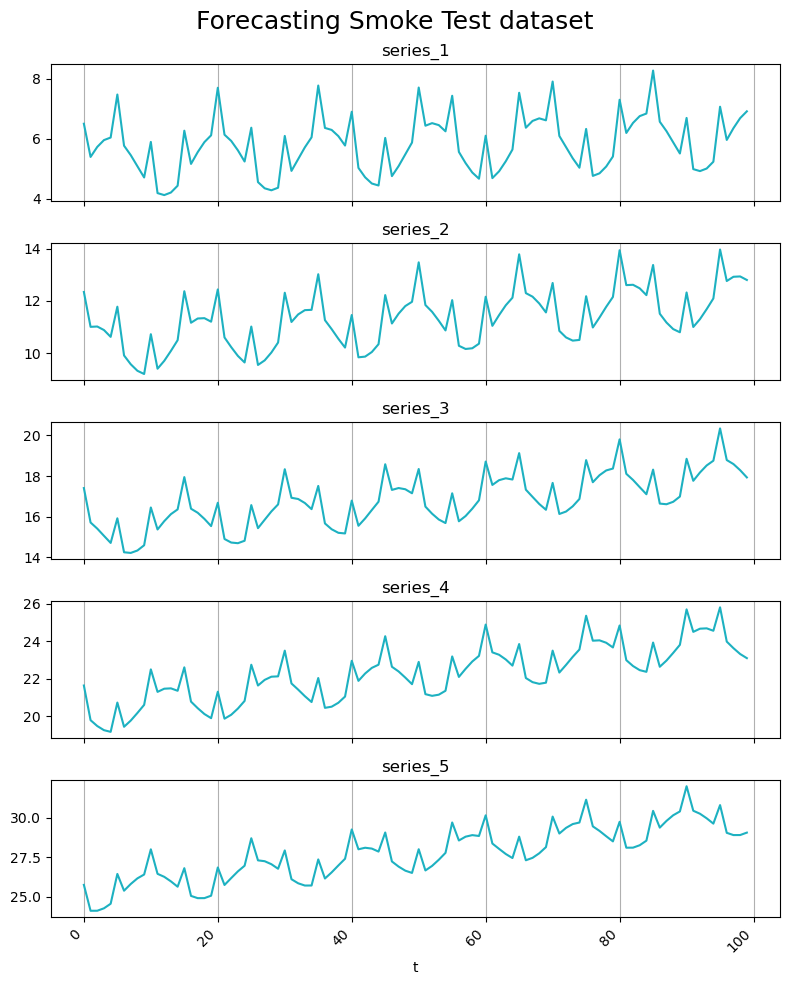

In [101]:
import matplotlib.pyplot as plt

def plot_trends(df, series_col, val_col, epoch_col, epoch_label, num_series=10,
                filepath=outp_fig_fname, chart_title=dataset_name):
    """
    This function takes a dataframe and a number of series to chart.
    It creates a n x 1 subplot (with n being the number of series, at most 10) and plots those series.
    
    Parameters:
    df (DataFrame): dataframe.
    num_series (int): The number of series to plot, defaulted to 10.
    """
    
    # Get the unique series from the dataframe
    unique_series = df[series_col].unique()
    
    # Limit the number of series to plot
    series_to_plot = unique_series[:min(len(unique_series), num_series)]
    
    # Set up the subplots
    fig, axes = plt.subplots(nrows=min(num_series, len(series_to_plot)), ncols=1, figsize=(8, num_series*1))
    
    # If there's only one series to plot, axes will not be an array, so we wrap it in a list
    if num_series == 1:
        axes = [axes]
    
    # Define the color for the plots
    plot_color = '#1db1c1'
    
    # Plot each series on a separate subplot
    for i, (ax, series_id) in enumerate(zip(axes, series_to_plot)):
        # Filter the dataframe for the current series
        series_data = df[df[series_col] == series_id]
                
        # Plot the data
        ax.plot(series_data[epoch_col], series_data[val_col], color=plot_color)
        
        # Set the title and labels
        ax.set_title(series_id)
        # ax.set_ylabel('Trend')
        # Show x-axis grid
        ax.xaxis.grid(True)
        
        # Show x-axis labels only for the last (bottom) plot
        if i < len(series_to_plot) - 1:
            ax.set_xticklabels([])
        else:
            # Rotate date labels to avoid overlap
            plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
            ax.set_xlabel(epoch_label)            
        
        # Rotate date labels to avoid overlap
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.suptitle(chart_title, fontsize=18)
    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Save figure
    plt.savefig(filepath)
    
    plt.show()

# Plot a few series
plot_trends(
    data,
    series_col=series_col,
    val_col=value_col,
    epoch_col=epoch_col,
    epoch_label='t',
    num_series=10,
    filepath=outp_fig_fname,
    chart_title="Forecasting Smoke Test dataset"
)  


# Save Main Data File

In [102]:
if time_col: 
    all_cols = [series_col, time_col, value_col] + exog_cols
else: 
    all_cols = [series_col, value_col] + exog_cols
data.sort_values(by=[series_col, epoch_col], inplace=True)
data[all_cols].to_csv(outp_fname, index=False, float_format="%.3f")